In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import torch
import torch.nn as nn
import seaborn as sns

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt



In [28]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)



In [29]:
# 1. Load and Preprocess the Banking Dataset
# Fetch Adult dataset (ID = 2)
adult = fetch_ucirepo(id=222)

# Extract features and target
X = adult.data.features  # Pandas DataFrame
y = adult.data.targets  # Pandas DataFrame


In [30]:
adult.metadata

{'uci_id': 222,
 'name': 'Bank Marketing',
 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing',
 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv',
 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).',
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 45211,
 'num_features': 16,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'],
 'target_col': ['y'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 2014,
 'last_updated': 'Fri Aug 18 2023',
 'dataset_doi': '10.24432/C5K306',
 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'],
 'intro_paper': {'ID': 277,
  'type': 'NATIVE',
  'title': 'A data-driven a

In [31]:
#Description of the dataset
print(adult.metadata['additional_info']['variable_info'])

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "no

In [32]:
X['target'] = y
X['target'] = X['target'].replace({'yes': 1, 'no': 0})

C:\Users\Samar\AppData\Local\Temp\ipykernel_7392\1703168639.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['target'] = X['target'].replace({'yes': 1, 'no': 0})


In [33]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0


In [34]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  target       45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [36]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [37]:
X.shape

(45211, 17)

In [38]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
target             0
dtype: int64

In [39]:
#Removing the features that are not needed

columns_to_drop = ['day_of_week','month','education','contact','poutcome']
try:
    X = X.drop(columns=columns_to_drop)
except:
    pass

#Removing records in which job is NaN
X = X.dropna(subset=['job'])

X.shape

(44923, 12)

In [40]:
X

,age,job,marital,default,balance,housing,loan,duration,campaign,pdays,previous,target
0,58,management,married,no,2143,yes,no,261,1,-1,0,0
1,44,technician,single,no,29,yes,no,151,1,-1,0,0
2,33,entrepreneur,married,no,2,yes,yes,76,1,-1,0,0
3,47,blue-collar,married,no,1506,yes,no,92,1,-1,0,0
5,35,management,married,no,231,yes,no,139,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,977,3,-1,0,1
45207,71,retired,divorced,no,1729,no,no,456,2,-1,0,1
45208,72,retired,married,no,5715,no,no,1127,5,184,3,1
45209,57,blue-collar,married,no,668,no,no,508,4,-1,0,0


In [41]:
X['default'].unique()

array(['no', 'yes'], dtype=object)

In [42]:
#Since the features default, housing, and loan are all features where the data is either a yes or no, it can be 
#converted to 0 and 1
X['default'] = X['default'].replace({'yes': 1, 'no': 0})
X['housing'] = X['housing'].replace({'yes': 1, 'no': 0})
X['loan'] = X['loan'].replace({'yes': 1, 'no': 0})
X

C:\Users\Samar\AppData\Local\Temp\ipykernel_7392\2921175369.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['default'] = X['default'].replace({'yes': 1, 'no': 0})
C:\Users\Samar\AppData\Local\Temp\ipykernel_7392\2921175369.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['housing'] = X['housing'].replace({'yes': 1, 'no': 0})
C:\Users\Samar\AppData\Local\Temp\ipykernel_7392\2921175369.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

,age,job,marital,default,balance,housing,loan,duration,campaign,pdays,previous,target
0,58,management,married,0,2143,1,0,261,1,-1,0,0
1,44,technician,single,0,29,1,0,151,1,-1,0,0
2,33,entrepreneur,married,0,2,1,1,76,1,-1,0,0
3,47,blue-collar,married,0,1506,1,0,92,1,-1,0,0
5,35,management,married,0,231,1,0,139,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,0,825,0,0,977,3,-1,0,1
45207,71,retired,divorced,0,1729,0,0,456,2,-1,0,1
45208,72,retired,married,0,5715,0,0,1127,5,184,3,1
45209,57,blue-collar,married,0,668,0,0,508,4,-1,0,0


In [43]:
# One-hot encoding the marital column
X = pd.get_dummies(X, columns=['marital'], prefix='marital')
X['marital_divorced'] = X['marital_divorced'].replace({True: 1, False: 0})
X['marital_married'] = X['marital_married'].replace({True: 1, False: 0})
X['marital_single'] = X['marital_single'].replace({True: 1, False: 0})
X

C:\Users\Samar\AppData\Local\Temp\ipykernel_7392\1670743143.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['marital_divorced'] = X['marital_divorced'].replace({True: 1, False: 0})
C:\Users\Samar\AppData\Local\Temp\ipykernel_7392\1670743143.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['marital_married'] = X['marital_married'].replace({True: 1, False: 0})
C:\Users\Samar\AppData\Local\Temp\ipykernel_7392\1670743143.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,target,marital_divorced,marital_married,marital_single
0,58,management,0,2143,1,0,261,1,-1,0,0,0,1,0
1,44,technician,0,29,1,0,151,1,-1,0,0,0,0,1
2,33,entrepreneur,0,2,1,1,76,1,-1,0,0,0,1,0
3,47,blue-collar,0,1506,1,0,92,1,-1,0,0,0,1,0
5,35,management,0,231,1,0,139,1,-1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,825,0,0,977,3,-1,0,1,0,1,0
45207,71,retired,0,1729,0,0,456,2,-1,0,1,1,0,0
45208,72,retired,0,5715,0,0,1127,5,184,3,1,0,1,0
45209,57,blue-collar,0,668,0,0,508,4,-1,0,0,0,1,0


In [44]:
X['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [45]:
X = X.drop('job', axis=1)
X

,age,default,balance,housing,loan,duration,campaign,pdays,previous,target,marital_divorced,marital_married,marital_single
0,58,0,2143,1,0,261,1,-1,0,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,0,1,0
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0
5,35,0,231,1,0,139,1,-1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,0,1,0
45207,71,0,1729,0,0,456,2,-1,0,1,1,0,0
45208,72,0,5715,0,0,1127,5,184,3,1,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,0,1,0


In [46]:
y = X['target']
X = X.drop('target', axis=1)

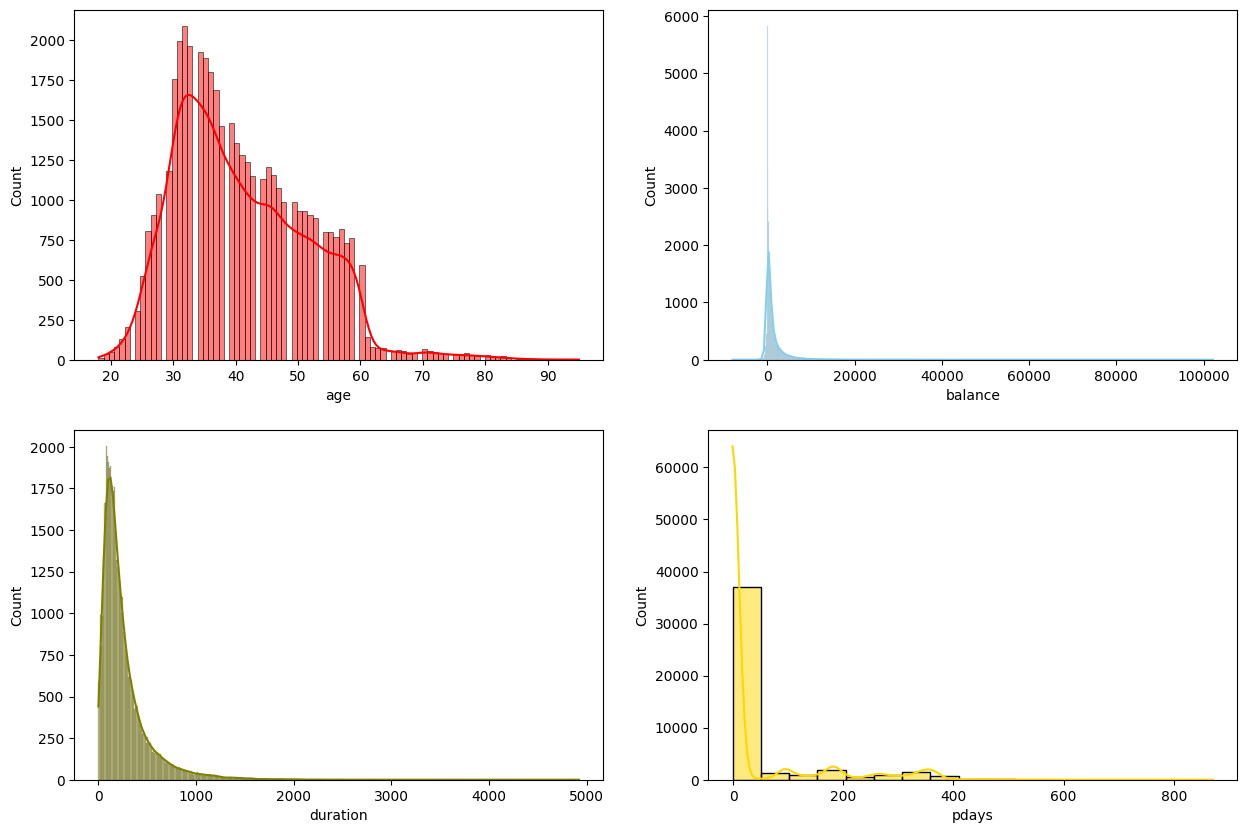

In [47]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= X, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= X, x="balance", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= X, x="duration", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= X, x="pdays", kde=True, color="gold", ax=axs[1,1])



plt.show()

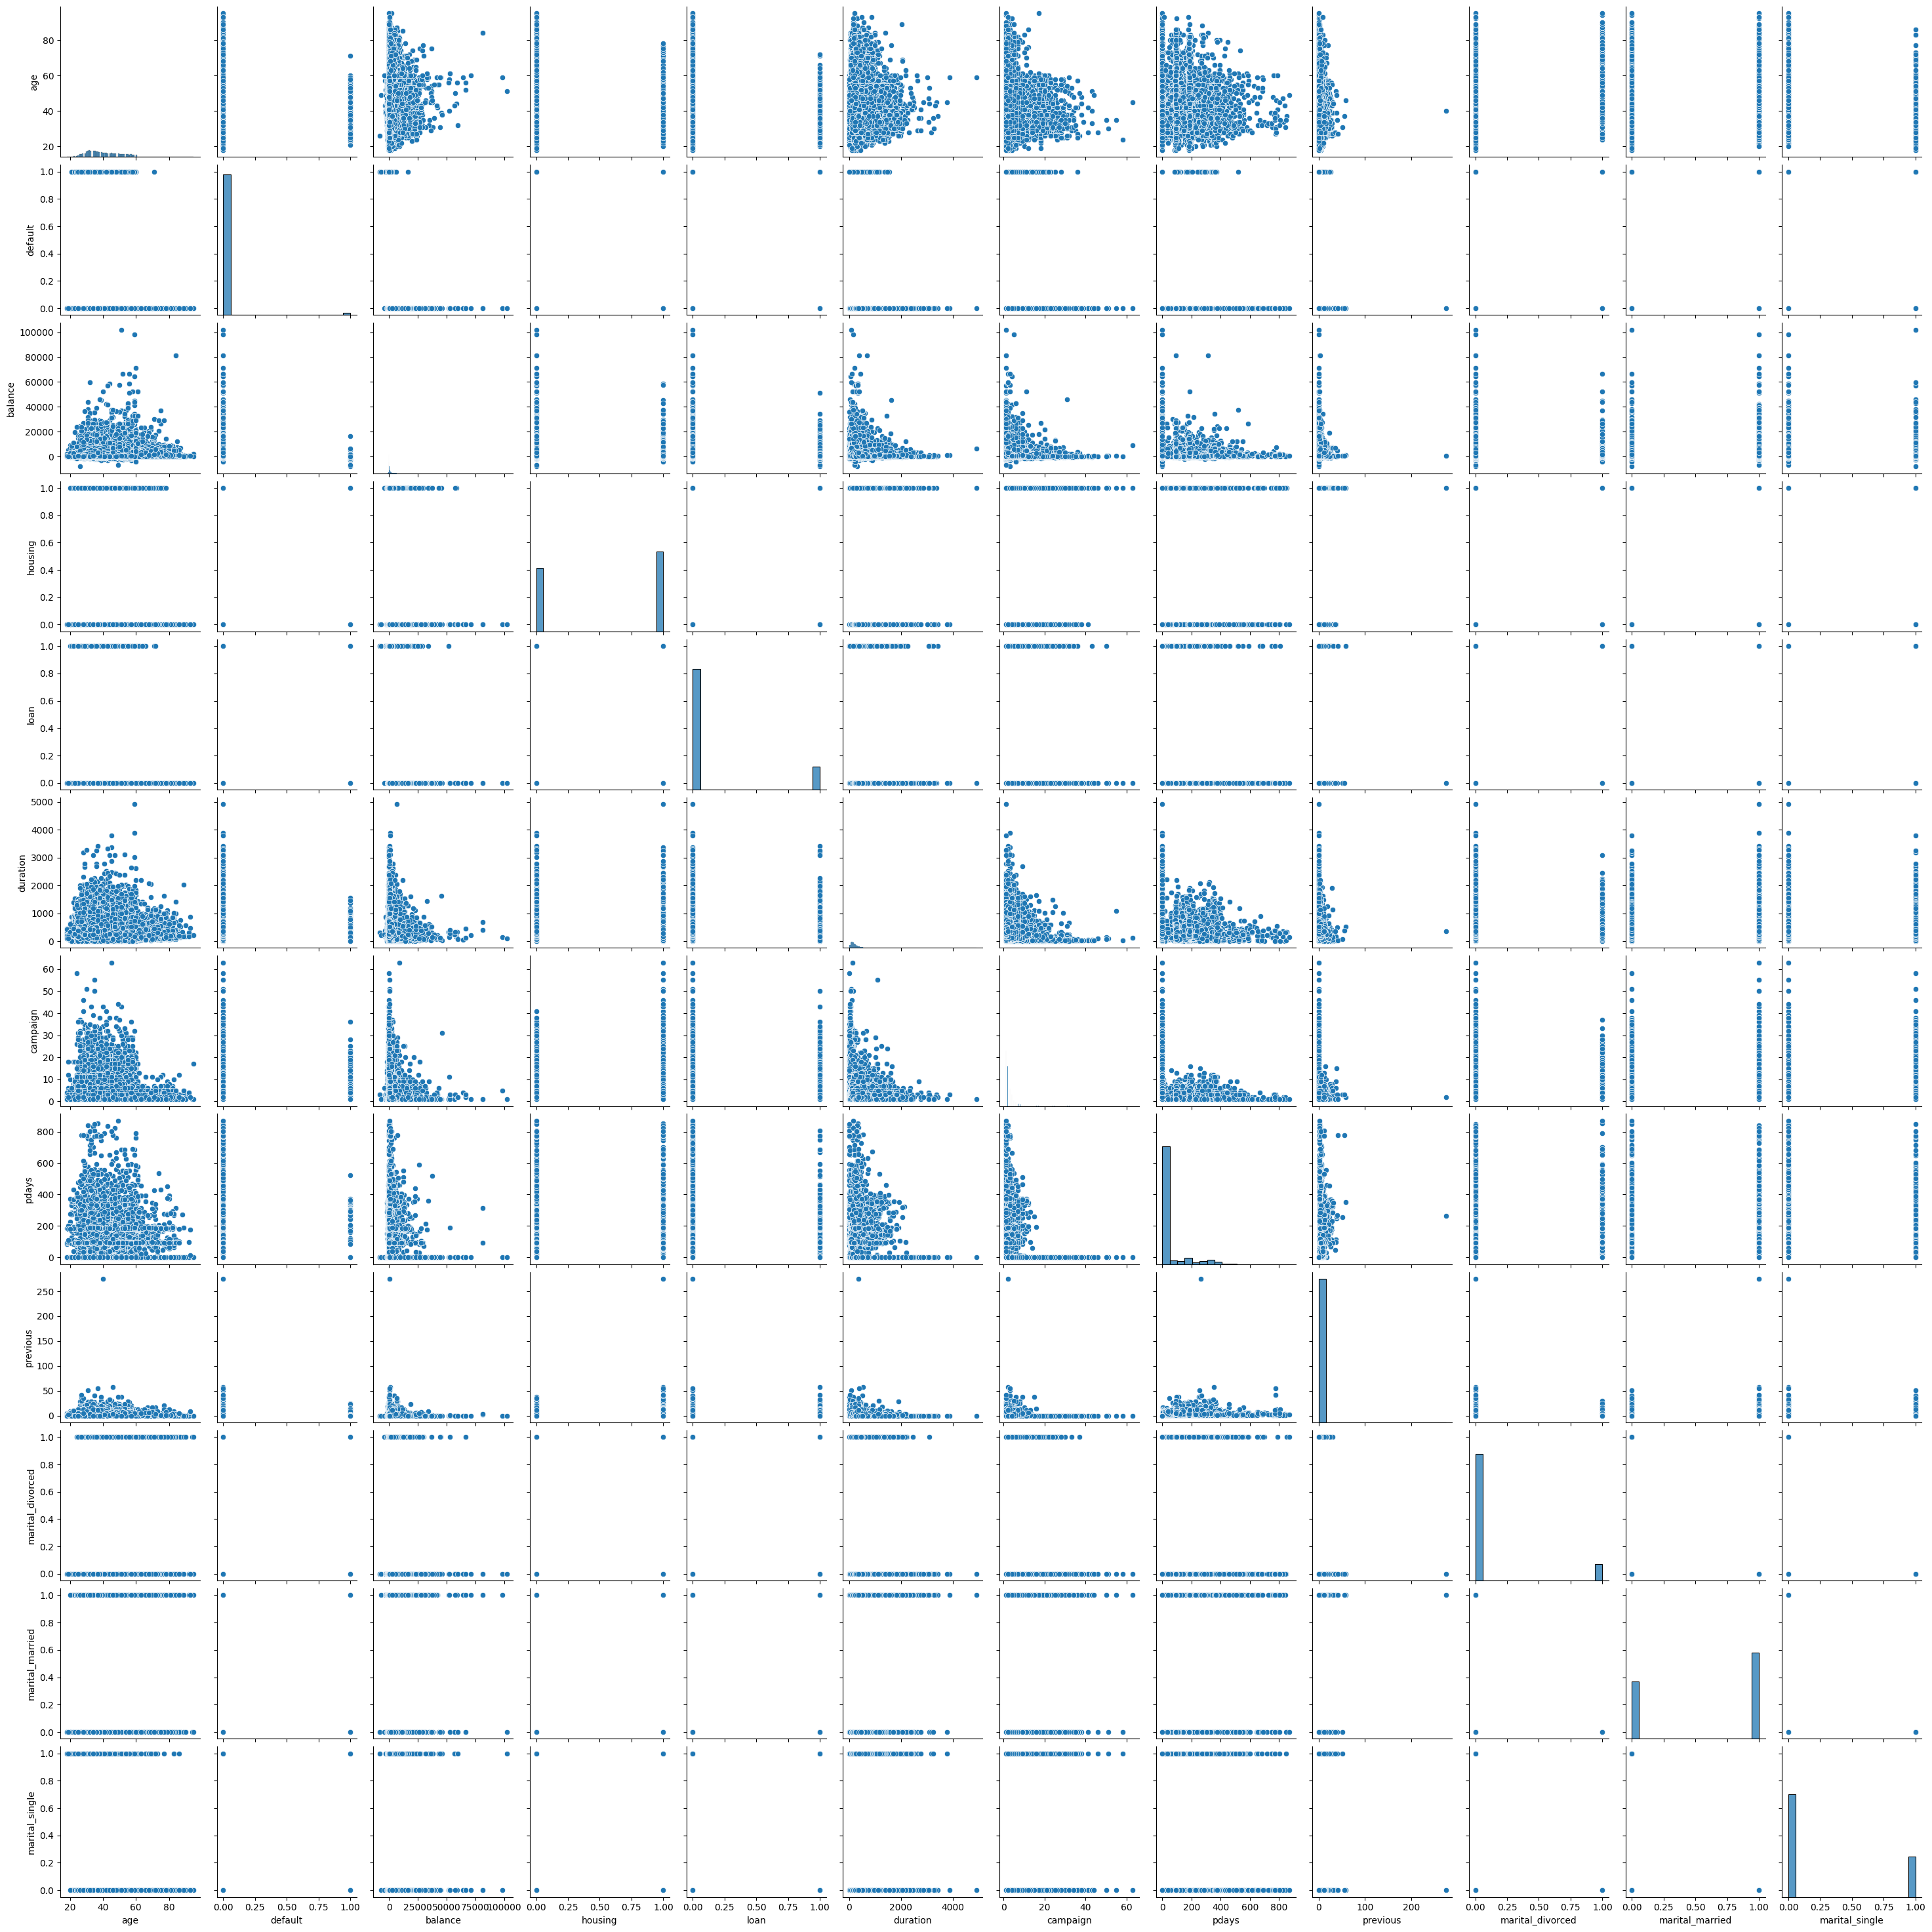

In [48]:
sns.pairplot(X)

In [49]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [53]:
# Converting to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)



In [66]:
neg_count = len(y_train[y_train == 0])
pos_count = len(y_train[y_train == 1])
print(neg_count)
print(pos_count)
pos_weight = torch.tensor([neg_count / pos_count], dtype=torch.float32)

27743
3703


In [67]:
# Creating the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim=16):
        super(LogisticRegression, self).__init__()
        # self.linear = nn.Linear(input_dim, 1)
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.relu(self.linear1(x))
        return torch.sigmoid(self.linear2(x))



In [68]:
# Initialize model, loss, and optimizer
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [69]:
# Training the model and tracking losses
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs.squeeze(), y_train)
    train_loss.backward()
    optimizer.step()
    
    
    train_losses.append(train_loss.item())
    
    # Evaluate test loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs.squeeze(), y_test)
            test_losses.append(test_loss.item())
        model.train()
        
        if (epoch + 1) % 100 == 0:  # Print progress
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")



Epoch [100/1000], Train Loss: 1.0588, Test Loss: 1.0572
Epoch [200/1000], Train Loss: 1.0514, Test Loss: 1.0538
Epoch [300/1000], Train Loss: 1.0484, Test Loss: 1.0528
Epoch [400/1000], Train Loss: 1.0466, Test Loss: 1.0522
Epoch [500/1000], Train Loss: 1.0454, Test Loss: 1.0519
Epoch [600/1000], Train Loss: 1.0446, Test Loss: 1.0518
Epoch [700/1000], Train Loss: 1.0439, Test Loss: 1.0514
Epoch [800/1000], Train Loss: 1.0433, Test Loss: 1.0515
Epoch [900/1000], Train Loss: 1.0428, Test Loss: 1.0513
Epoch [1000/1000], Train Loss: 1.0422, Test Loss: 1.0510


In [70]:
# Testing the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze()
    y_pred_class = (y_pred >= 0.5).float()
    accuracy = (y_pred_class == y_test).sum().item() / len(y_test)
    print(f"\nAccuracy: {accuracy:.2f}")




Accuracy: 0.84



Confusion Matrix:
[[10197  1728]
 [  423  1129]]


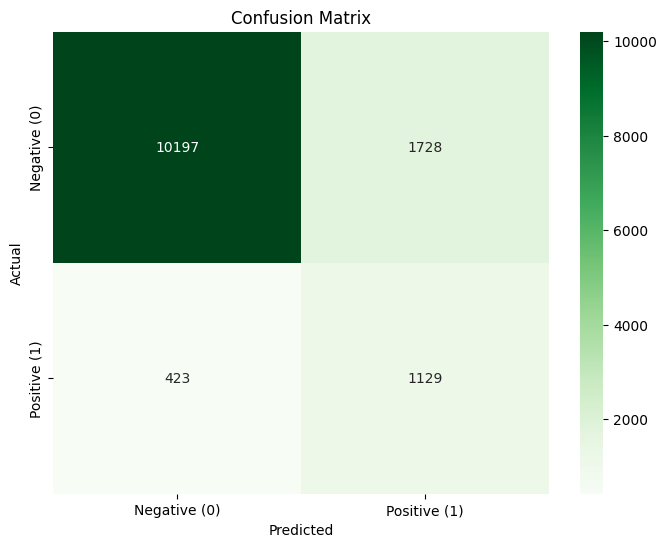

In [71]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative (0)', 'Positive (1)'], 
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
acc = accuracy_score(y_test, y_pred_class)
print("\nAccuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: {acc:.2f}
Precision: 0.40
Recall: 0.73
F1-Score: 0.51


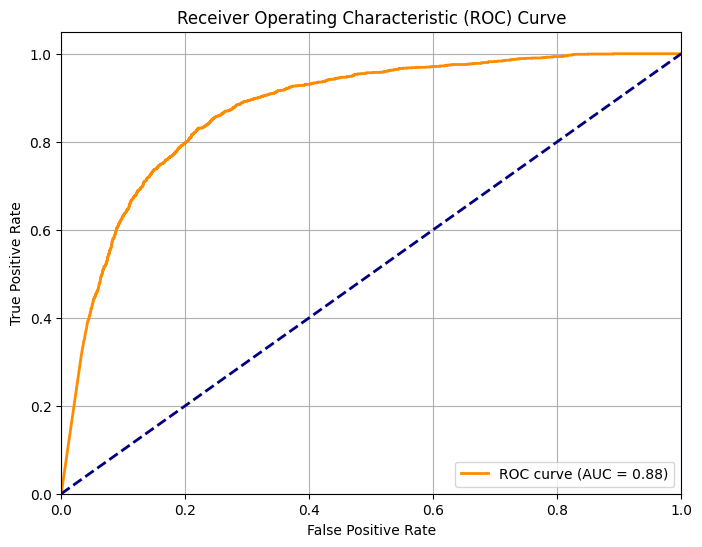

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

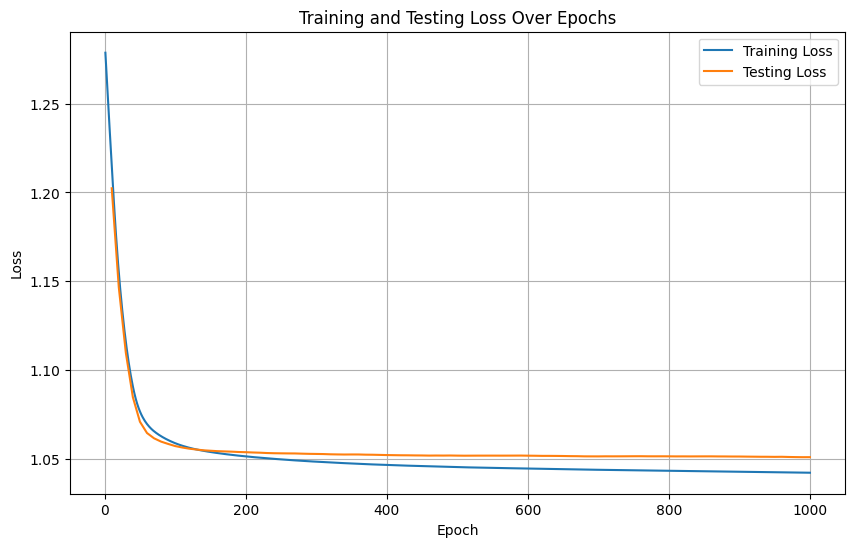

In [74]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(10, num_epochs + 1, 10), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()